n = 1000 h = 0.1 y(x) = ((x-1)*sin(sqrt(2)*x)/sqrt(2)) + (x+1)*cos(sqrt(2)*x)
Time taken by Backward Euler method: 7.004261016845703
Average percentage error of Backward Euler method: 107.2629840518037


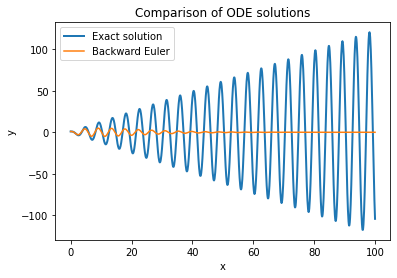

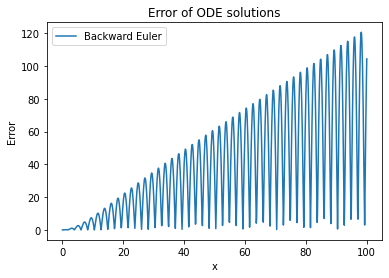

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Define the exact solution
def exact_solution(x):
    return ((x-1)*np.sin(np.sqrt(2)*x)/np.sqrt(2)) + (x+1)*np.cos(np.sqrt(2)*x)

# Define the derivative function in terms of y'
def deriv_func(x, y):
    return np.array([y[1], y[2], y[3], -4*y[0] - 4*y[2]])

# Define the Backward Euler method
def backward_euler(deriv_func, x0, y0, h, n):
    t0 = time.time()
    x = x0
    y = y0
    y_list = [y0[0]]
    for i in range(n):
        y_next = y + h*deriv_func(x+h, y+h*deriv_func(x, y))
        y = y_next
        x = x + h
        y_list.append(y[0])
    t1 = time.time()
    return np.array(y_list), (t1-t0)*1000

# Set the initial conditions and parameters
x0 = 0
y0 = np.array([1, 0, 0, -4])
h = 0.1
n = 1000

# Calculate the exact solution
x = np.linspace(x0, x0+h*n, n+1)
y_exact = exact_solution(x)

# Calculate the Backward Euler solution and time
y_backward, t_backward = backward_euler(deriv_func, x0, y0, h, n)

# Calculate the tolerance values
tol_backward = np.abs(y_backward - y_exact)

# Plot the results
plt.figure()
plt.plot(x, y_exact, label='Exact solution', linewidth=2)
plt.plot(x, y_backward, label='Backward Euler')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of ODE solutions')
plt.legend()

plt.figure()
plt.plot(x, tol_backward, label='Backward Euler')
plt.xlabel('x')
plt.ylabel('Error')
plt.title('Error of ODE solutions')
plt.legend()

print('n =',n,'h =',h,'y(x) = ((x-1)*sin(sqrt(2)*x)/sqrt(2)) + (x+1)*cos(sqrt(2)*x)')
print('Time taken by Backward Euler method:', t_backward)

APE_backward = np.mean(np.abs(tol_backward/y_exact)[1:])*100

# Print the results
print('Average percentage error of Backward Euler method:', APE_backward)
